# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [21]:
dataset = pd.read_csv("diabetes.csv")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

features = dataset.drop(columns='Diabetes')
target = dataset['Diabetes']

train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

ada_boost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
ada_boost_model.fit(train_features, train_target)

gradient_boost_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3
)
gradient_boost_model.fit(train_features, train_target)

xg_boost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xg_boost_model.fit(train_features, train_target)

ada_predictions = ada_boost_model.predict(test_features)
gradient_boost_predictions = gradient_boost_model.predict(test_features)
xg_boost_predictions = xg_boost_model.predict(test_features)

print("AdaBoost Model Accuracy:", accuracy_score(test_target, ada_predictions))
print("Gradient Boosting Model Accuracy:", accuracy_score(test_target, gradient_boost_predictions))
print("XGBoost Model Accuracy:", accuracy_score(test_target, xg_boost_predictions))

search_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}
grid_search_model = GridSearchCV(
    estimator=AdaBoostClassifier(), param_grid=search_params, cv=5
)
grid_search_model.fit(train_features, train_target)

print("Best Parameters for AdaBoost:", grid_search_model.best_params_)

AdaBoost Model Accuracy: 0.9419279907084785
Gradient Boosting Model Accuracy: 0.9442508710801394
XGBoost Model Accuracy: 0.943089430894309
Best Parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}


In [22]:
xgboost_no_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgboost_no_reg.fit(train_features, train_target)

xgboost_l1 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.1, random_state=42)
xgboost_l1.fit(train_features, train_target)

xgboost_l2 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1, random_state=42)
xgboost_l2.fit(train_features, train_target)

predictions_no_reg = xgboost_no_reg.predict(test_features)
predictions_l1 = xgboost_l1.predict(test_features)
predictions_l2 = xgboost_l2.predict(test_features)

def assess_model_performance(true_labels, predicted_labels):
    acc = accuracy_score(true_labels, predicted_labels)
    prec = precision_score(true_labels, predicted_labels)
    rec = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    auc = roc_auc_score(true_labels, predicted_labels)

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": auc
    }


performance_no_reg = assess_model_performance(test_target, predictions_no_reg)
performance_l1 = assess_model_performance(test_target, predictions_l1)
performance_l2 = assess_model_performance(test_target, predictions_l2)

print("Performance (No Regularization):", performance_no_reg)
print("Performance (L1 Regularization):", performance_l1)
print("Performance (L2 Regularization):", performance_l2)

Performance (No Regularization): {'Accuracy': 0.943089430894309, 'Precision': 0.9433962264150944, 'Recall': 0.8438818565400844, 'F1 Score': 0.89086859688196, 'ROC AUC': 0.9123255436546575}
Performance (L1 Regularization): {'Accuracy': 0.9419279907084785, 'Precision': 0.943127962085308, 'Recall': 0.8396624472573839, 'F1 Score': 0.8883928571428571, 'ROC AUC': 0.9102158390133074}
Performance (L2 Regularization): {'Accuracy': 0.943089430894309, 'Precision': 0.9433962264150944, 'Recall': 0.8438818565400844, 'F1 Score': 0.89086859688196, 'ROC AUC': 0.9123255436546575}


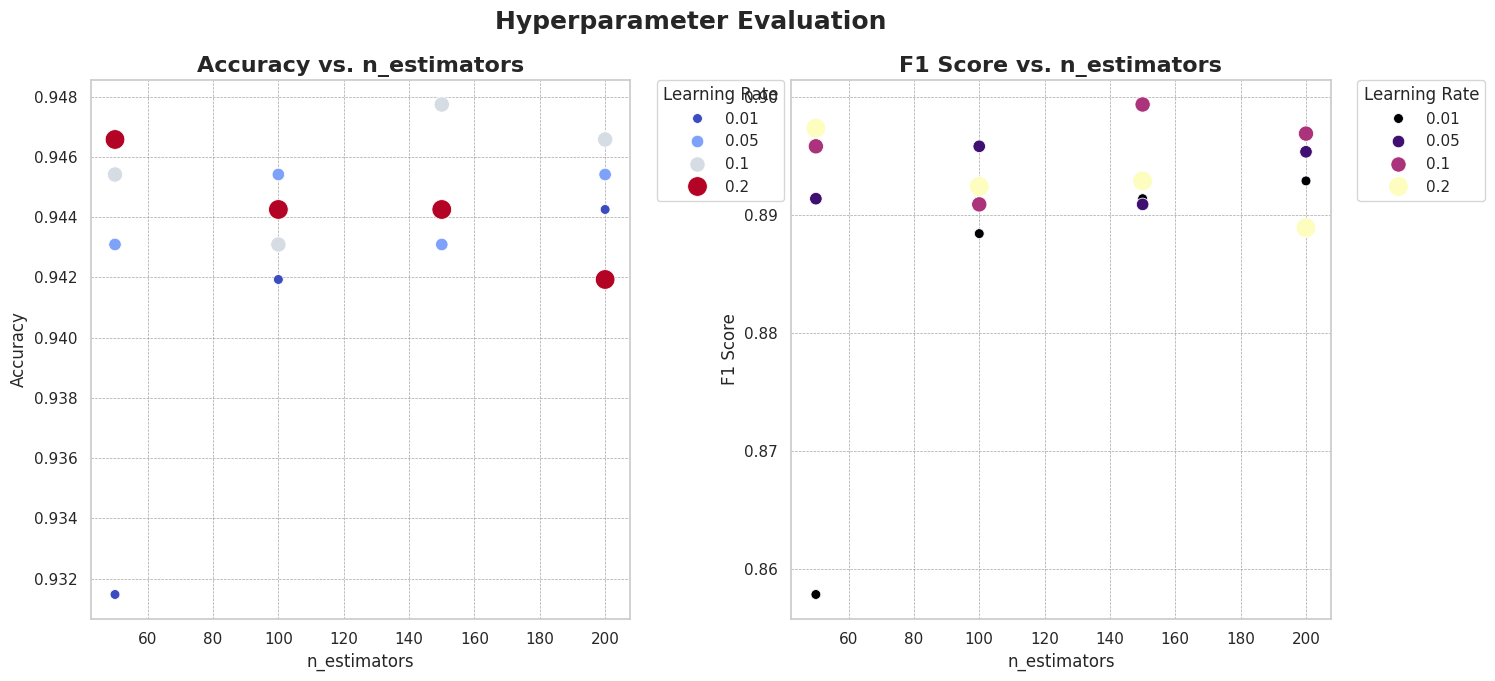

In [23]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 7), dpi=100)

sns.scatterplot(
    x=n_estimators_array,
    y=accuracy_array,
    hue=learning_rate_array,
    palette="coolwarm",
    size=learning_rate_array,
    sizes=(50, 200),
    ax=axes[0]
)
axes[0].set_title('Accuracy vs. n_estimators', fontsize=16, fontweight='bold')
axes[0].set_xlabel('n_estimators', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(title='Learning Rate', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

sns.scatterplot(
    x=n_estimators_array,
    y=f1_score_array,
    hue=learning_rate_array,
    palette="magma",
    size=learning_rate_array,
    sizes=(50, 200),
    ax=axes[1]
)
axes[1].set_title('F1 Score vs. n_estimators', fontsize=16, fontweight='bold')
axes[1].set_xlabel('n_estimators', fontsize=12)
axes[1].set_ylabel('F1 Score', fontsize=12)
axes[1].legend(title='Learning Rate', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.suptitle('Hyperparameter Evaluation', fontsize=18, fontweight='bold')
plt.show()


Висновок: XGBoost показав найкращі результати завдяки ефективній оптимізації та регуляризації, що дозволило уникнути перенавчання. Gradient Boosting теж добре справляється зі складними задачами, але потребує більше ресурсів. AdaBoost підійде для простих задач або невеликих даних. Якщо потрібна максимальна точність і є ресурси, краще обрати XGBoost.